# Lectura y graficación de una señal almacenada en un archivo txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [15]:
f = open("Señal_EMG_prueba_final.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

#raw_data

[]


In [16]:
Fs = 1000
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [17]:
array = np.genfromtxt("Señal_EMG_prueba_final.txt", delimiter="\t",skip_header = 4)
array

array([[  1.,   0.,   0., ...,   0., 515.,  nan],
       [  2.,   0.,   0., ...,   0., 513.,  nan],
       [  3.,   0.,   0., ...,   0., 515.,  nan],
       ...,
       [ 11.,   0.,   0., ...,   0., 479.,  nan],
       [ 12.,   0.,   0., ...,   0., 464.,  nan],
       [ 13.,   0.,   0., ...,   0., 460.,  nan]])

## Ploteamos la lectura

In [19]:
muestras=array[:,-2].shape

(89549,)

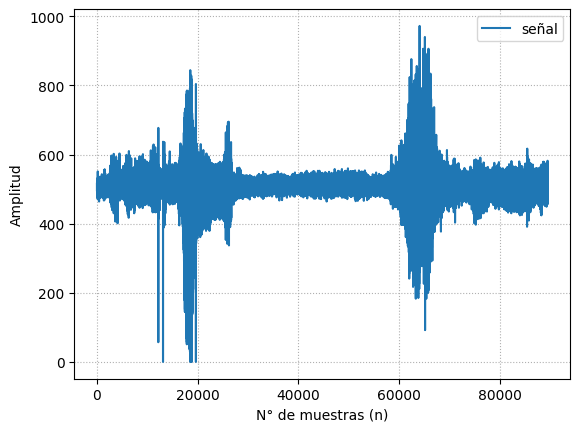

In [20]:

plt.plot(array[:,-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("N° de muestras (n)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 8.9546e+01 8.9547e+01 8.9548e+01]


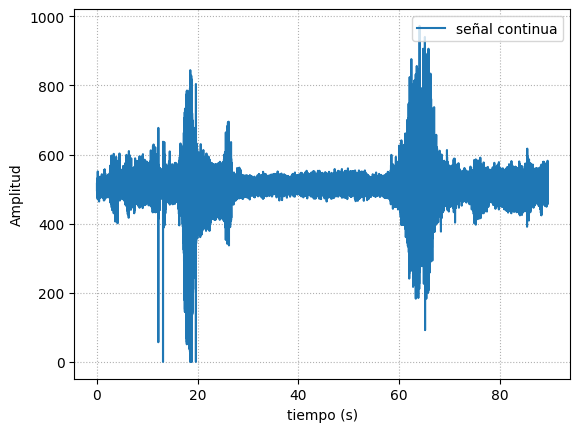

In [29]:
n=np.arange(0,89549)
t_continuo=n*Ts
print(t_continuo)

#Plot de la señal continua

plt.plot(t_continuo,array[:,-2], label="señal continua")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

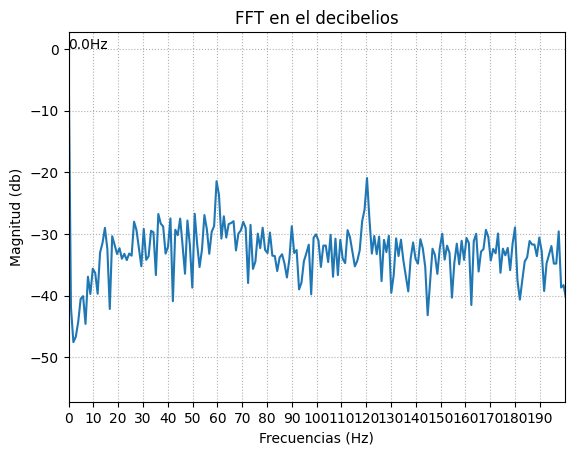

In [21]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()